In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
%matplotlib inline

    max  min
1    39   21
2    41   23
3    43   27
4    47   28
5    49   32
6    51   35
7    45   31
8    38   28
9    37   21
10   29   19
11   27   17
12   25   18


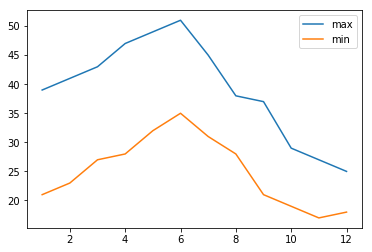

In [2]:
max_data=[39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25]
min_data=[21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]
index=[1,2,3,4,5,6,7,8,9,10,11,12]
df=pd.DataFrame(list(zip(max_data,min_data)),index=index,columns=['max','min'])
print(df)
df.plot()

In [3]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, index,
                                      max_data, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, index,
                                      min_data, [-40, 20, 0])

Text(0,0.5,'Min and max temperature')

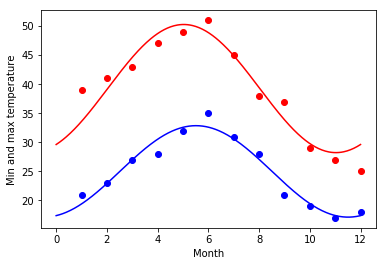

In [4]:
days = np.linspace(0, 12, num=365)

plt.plot(index, max_data, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(index, min_data, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Min and max temperature')

In [76]:
url='https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url)

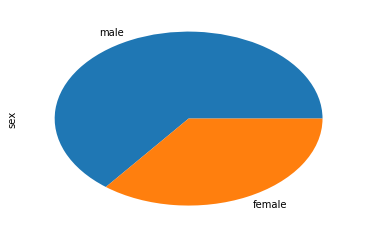

In [56]:
titanic.sex.value_counts().plot(kind='pie')



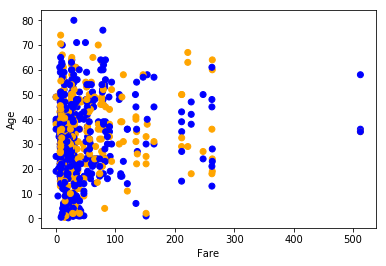

In [5]:
url='https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url)
#colors={'male':'blue','female':'red'}
colors = {'male':'blue', 'female':'orange'}
c1={'male':'blue'}
titanic.dropna(subset = ['sex'],inplace=True)
fig, ax = plt.subplots()
#ax.scatter(titanic['fare'], titanic['age'],c=titanic['sex'].apply(lambda x: colors[x]))
ax.scatter(titanic.fare,titanic.age,c=titanic['sex'].iloc[:-1].apply(lambda x: 
    colors[x]))
plt.xlabel('Fare')
plt.ylabel('Age')
plt.show()